In [71]:
## import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from math import sqrt

In [2]:
#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model


from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV


In [3]:
#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score


In [4]:
#cross validation
from sklearn.model_selection import train_test_split

In [5]:
## import data
credit = pd.read_csv('default of credit card clients.csv', header =1)

In [6]:
## view data
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [7]:
credit.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [8]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [9]:
## drop ID column 
credit.drop('ID',axis=1,inplace=True)

In [10]:
## check null values
credit.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [11]:
## rename default payment next month column
credit = credit.rename(columns={'default payment next month': 'def_pay'})

In [12]:
## education counts
credit.groupby('EDUCATION')['EDUCATION'].count()

EDUCATION
0       14
1    10585
2    14030
3     4917
4      123
5      280
6       51
Name: EDUCATION, dtype: int64

In [13]:
## marriage counts
credit.groupby('MARRIAGE')['MARRIAGE'].count()

MARRIAGE
0       54
1    13659
2    15964
3      323
Name: MARRIAGE, dtype: int64

In [14]:
fil = (credit.EDUCATION == 5) | (credit.EDUCATION == 6) | (credit.EDUCATION == 0)
credit.loc[fil, 'EDUCATION'] = 4
credit.EDUCATION.value_counts()


2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [15]:
credit.head()


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [16]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_0        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
def_pay      30000 non-null int64
dtypes: int64(24)
memory usage: 5.5 MB


In [17]:
credit.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'def_pay'],
      dtype='object')

In [18]:
## reorder columns
credit = credit[['def_pay', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',]]

In [19]:
credit.columns

Index(['def_pay', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [20]:
## highly correlated features
## correlation
corrMat = credit.corr()
print(corrMat)


            def_pay  LIMIT_BAL       SEX  EDUCATION  MARRIAGE       AGE  \
def_pay    1.000000  -0.153520 -0.039961   0.033842 -0.024339  0.013890   
LIMIT_BAL -0.153520   1.000000  0.024755  -0.231088 -0.108139  0.144713   
SEX       -0.039961   0.024755  1.000000   0.013627 -0.031389 -0.090874   
EDUCATION  0.033842  -0.231088  0.013627   1.000000 -0.149134  0.182434   
MARRIAGE  -0.024339  -0.108139 -0.031389  -0.149134  1.000000 -0.414170   
AGE        0.013890   0.144713 -0.090874   0.182434 -0.414170  1.000000   
PAY_0      0.324794  -0.271214 -0.057643   0.112593  0.019917 -0.039447   
PAY_2      0.263551  -0.296382 -0.070771   0.129703  0.024199 -0.050148   
PAY_3      0.235253  -0.286123 -0.066096   0.122425  0.032688 -0.053048   
PAY_4      0.216614  -0.267460 -0.060173   0.116531  0.033122 -0.049722   
PAY_5      0.204149  -0.249411 -0.055064   0.104088  0.035629 -0.053826   
PAY_6      0.186866  -0.235195 -0.044008   0.088986  0.034345 -0.048773   
BILL_AMT1 -0.019644   0.2

In [21]:
## remove highly correlated features
credit.drop('BILL_AMT1',axis=1,inplace=True)
credit.drop('BILL_AMT2',axis=1,inplace=True)
credit.drop('BILL_AMT3',axis=1,inplace=True)
credit.drop('BILL_AMT4',axis=1,inplace=True)
credit.drop('BILL_AMT5',axis=1,inplace=True)
credit.drop('BILL_AMT6',axis=1,inplace=True)

In [22]:
credit.columns

Index(['def_pay', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

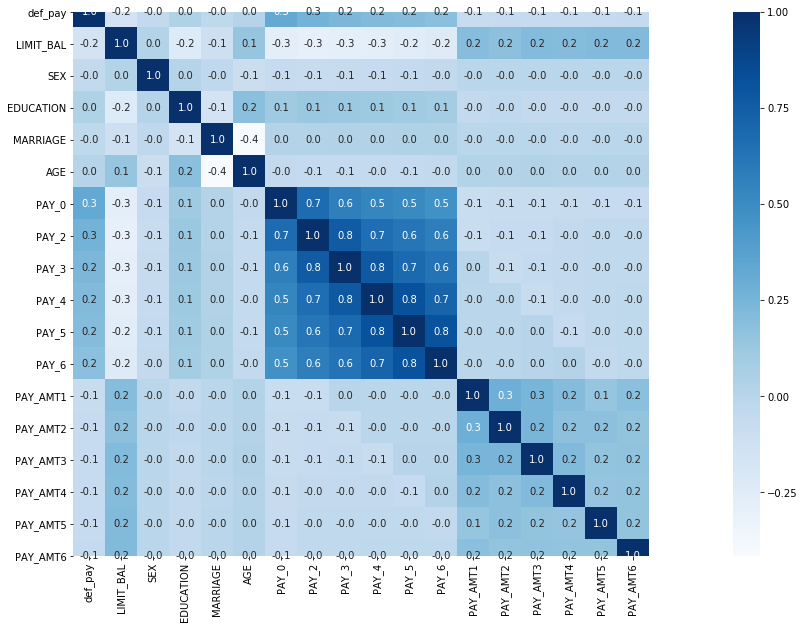

In [23]:
corrMat = credit.corr()
plt.subplots(figsize=(30,10))
sns.heatmap( corrMat, square=True, annot=True, fmt=".1f", cmap="Blues")

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

X = credit.drop('def_pay', axis=1)
target = credit['def_pay']

rfc = RandomForestClassifier(random_state=101)
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(10), scoring='accuracy')
rfecv.fit(X, target)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: F

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                       criterion='gini', max_depth=None,
                                       max_features='auto', max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators='warn', n_jobs=None,
                                       oob_score=False, random_state=101,
                                       verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

In [25]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 12


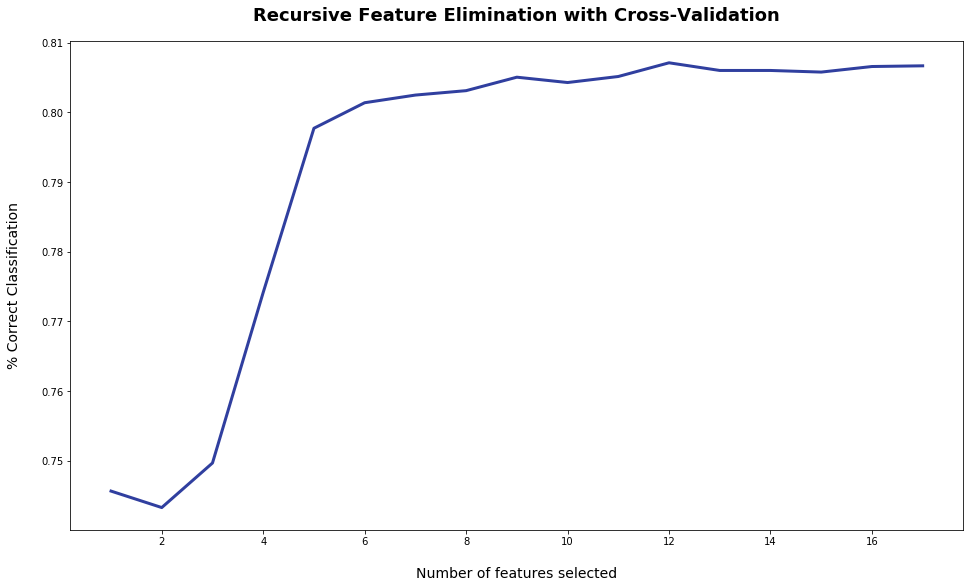

In [26]:
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

plt.show()

In [27]:
print(np.where(rfecv.support_ == False)[0])
X.drop(X.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)

[ 1  3  8  9 10]


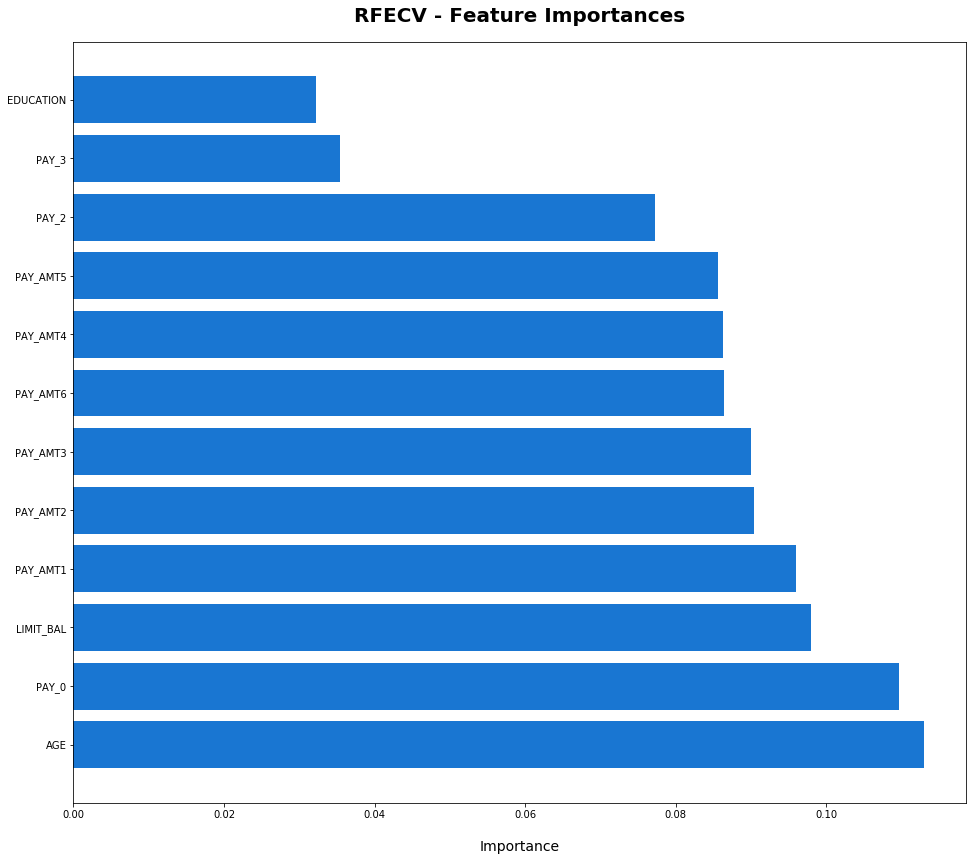

In [28]:
dset = pd.DataFrame()
dset['attr'] = X.columns
dset['importance'] = rfecv.estimator_.feature_importances_

dset = dset.sort_values(by='importance', ascending=False)


plt.figure(figsize=(16, 14))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

In [29]:
creditrfe = credit

In [30]:
creditrfe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 18 columns):
def_pay      30000 non-null int64
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_0        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
dtypes: int64(18)
memory usage: 4.1 MB


In [31]:
## remove features non optimal features from RFE
creditrfe.drop('SEX',axis=1,inplace=True)
creditrfe.drop('MARRIAGE',axis=1, inplace=True)
creditrfe.drop('PAY_4',axis=1, inplace=True)
creditrfe.drop('PAY_5',axis=1, inplace=True)
creditrfe.drop('PAY_6',axis=1, inplace=True)

In [32]:
creditrfe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 13 columns):
def_pay      30000 non-null int64
LIMIT_BAL    30000 non-null int64
EDUCATION    30000 non-null int64
AGE          30000 non-null int64
PAY_0        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
dtypes: int64(13)
memory usage: 3.0 MB


In [33]:
## categorical variables
categorical_vars = ['PAY_0','PAY_2','PAY_3', 'EDUCATION']
creditrfe[categorical_vars] = credit[categorical_vars].astype(str)
creditrfe = pd.get_dummies(creditrfe, columns=categorical_vars)
creditrfe.head()

,def_pay,LIMIT_BAL,AGE,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,PAY_0_-1,...,PAY_3_3,PAY_3_4,PAY_3_5,PAY_3_6,PAY_3_7,PAY_3_8,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4
0,1,20000,24,0,689,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,120000,26,0,1000,1000,1000,0,2000,1,...,0,0,0,0,0,0,0,1,0,0
2,0,90000,34,1518,1500,1000,1000,1000,5000,0,...,0,0,0,0,0,0,0,1,0,0
3,0,50000,37,2000,2019,1200,1100,1069,1000,0,...,0,0,0,0,0,0,0,1,0,0
4,0,50000,57,2000,36681,10000,9000,689,679,1,...,0,0,0,0,0,0,0,1,0,0


In [34]:
creditrfe.shape


(30000, 46)

In [35]:
#features
features = creditrfe.iloc[:,1:46]
print('Summary of feature sample')
features.head()


Summary of feature sample


,LIMIT_BAL,AGE,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,PAY_0_-1,PAY_0_-2,...,PAY_3_3,PAY_3_4,PAY_3_5,PAY_3_6,PAY_3_7,PAY_3_8,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4
0,20000,24,0,689,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,120000,26,0,1000,1000,1000,0,2000,1,0,...,0,0,0,0,0,0,0,1,0,0
2,90000,34,1518,1500,1000,1000,1000,5000,0,0,...,0,0,0,0,0,0,0,1,0,0
3,50000,37,2000,2019,1200,1100,1069,1000,0,0,...,0,0,0,0,0,0,0,1,0,0
4,50000,57,2000,36681,10000,9000,689,679,1,0,...,0,0,0,0,0,0,0,1,0,0


In [36]:
#dependent variable
depVar = creditrfe['def_pay']


In [37]:
X = creditrfe.drop(['def_pay'], axis=1)#.values
y = creditrfe['def_pay']#.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)


In [38]:
X_train.shape, X_test.shape


((21000, 45), (9000, 45))

In [39]:
y_train.shape, y_test.shape


((21000,), (9000,))

In [40]:
## models
modelKNN = KNeighborsClassifier()
modelRF = RandomForestClassifier()
modelDT = DecisionTreeClassifier()
modelSVC = SVC()


In [41]:
## model fitting & scores - KNN

modelKNN.fit(X_train,y_train)
print(cross_val_score(modelKNN, X_train, y_train))
modelKNN.score(X_train,y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.75332095 0.74814286 0.7581083 ]


0.8143809523809524

In [42]:
## model fitting & scores - RF

modelRF.fit(X_train,y_train)
print(cross_val_score(modelRF, X_train, y_train))
modelRF.score(X_train,y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.80088559 0.80471429 0.80597228]


0.9771904761904762

In [43]:
## model fitting & scores - DT

modelDT.fit(X_train,y_train)
print(cross_val_score(modelDT, X_train, y_train))
modelDT.score(X_train,y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.71446936 0.71257143 0.7161023 ]


0.9982857142857143

In [44]:
## model fitting & scores - SVC

modelSVC.fit(X_train,y_train)
print(cross_val_score(modelSVC, X_train, y_train))
modelSVC.score(X_train,y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto'

[0.77803171 0.77985714 0.77868267]


0.9862380952380952

In [45]:
## model fitting & scores - DT with max depth of 5

modelDT5 = DecisionTreeClassifier(max_depth = 5, random_state = 0)
modelDT5.fit(X_train,y_train)
print(cross_val_score(modelDT5, X_train, y_train))
modelDT5.score(X_train,y_train)

[0.81931153 0.81171429 0.81868838]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.8203333333333334

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
crossvalidation = KFold(n_splits=5, shuffle=True, random_state=1)
modelRF2 = RandomForestClassifier(n_estimators=300, random_state=1)
modelRF2.fit(X_train, y_train)
print(cross_val_score(modelRF2, X_train, y_train))
modelRF2.score(X_train,y_train)
                    


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.81188402 0.80885714 0.81497357]


0.9982857142857143

In [47]:
from sklearn.neighbors import KNeighborsClassifier
modelKNN5 = KNeighborsClassifier (n_neighbors=5)
modelKNN5.fit(X_train,y_train)
print(cross_val_score(modelKNN5, X_train, y_train))
modelKNN5.score(X_train,y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.75332095 0.74814286 0.7581083 ]


0.8143809523809524

In [48]:
modelRFdepth10 = RandomForestClassifier (max_depth = 10)
modelRFdepth10.fit(X_train,y_train)
print(cross_val_score(modelRFdepth10, X_train, y_train))
modelRFdepth10.score(X_train,y_train)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.81874018 0.81442857 0.81697385]


0.8401904761904762

In [49]:
modelRFdepth15 = RandomForestClassifier (max_depth = 15)
modelRFdepth15.fit(X_train,y_train)
print(cross_val_score(modelRFdepth15, X_train, y_train))
modelRFdepth15.score(X_train,y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.81045565 0.80642857 0.81425918]


0.882095238095238

In [50]:
from sklearn.model_selection import GridSearchCV
modelSVC2 = SVC(class_weight='balanced', random_state=1)
search_space = {'C': np.logspace(-3, 3, 7)}
gridsearch = GridSearchCV (modelSVC2, param_grid=search_space, scoring='accuracy', refit=True, cv=3)
gridsearch.fit(X_train, y_train)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarni

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight='balanced',
                           coef0=0.0, decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=1, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [51]:
print(cross_val_score(gridsearch, X_train, y_train))
gridsearch.score(X_train,y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto'

[0.77774604 0.77828571 0.77668238]


0.2211904761904762

In [52]:
from sklearn.tree import DecisionTreeClassifier

DT_5 = DecisionTreeClassifier(criterion='entropy', 
                                  random_state=42, 
                                 max_leaf_nodes=5,
                                 class_weight='balanced')
DT_5.fit(X_train, y_train)




DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=5,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [53]:
print(cross_val_score(DT_5, X_train, y_train))
DT_5.score(X_train,y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.64919297 0.75728571 0.80497214]


0.8018095238095239

In [54]:
from sklearn.svm import SVC

SVC_2 = SVC(gamma='auto', C=1, class_weight='balanced')
SVC_2.fit(X_train, y_train)
print (cross_val_score(SVC_2, X_train, y_train))
SVC_2.score(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.77246108 0.774      0.77511073]


0.9806666666666667

In [55]:
modelRFdepth15_predictions = modelRFdepth15.predict(X_test)

In [57]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

modelRFdepth15_predictions_cv_score = cross_val_score(modelRFdepth15, X, y, cv=10, scoring='roc_auc')

In [62]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, modelRFdepth15_predictions))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, modelRFdepth15_predictions))
print('\n')
print("=== All AUC Scores ===")
print(modelRFdepth15_predictions_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", modelRFdepth15_predictions_cv_score.mean())

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, modelRFdepth15_predictions))

=== Confusion Matrix ===
[[6657  352]
 [1266  725]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7009
           1       0.67      0.36      0.47      1991

    accuracy                           0.82      9000
   macro avg       0.76      0.66      0.68      9000
weighted avg       0.80      0.82      0.80      9000



=== All AUC Scores ===
[0.72649616 0.73624504 0.73870707 0.71966782 0.76452224 0.77559016
 0.79486017 0.7649903  0.77239296 0.75968157]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.7553153505958977
Accuracy: 0.8202222222222222


In [82]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, modelRFdepth15_predictions)
acc = accuracy_score(y_test, modelRFdepth15_predictions)
prec = precision_score(y_test, modelRFdepth15_predictions)
rec = recall_score(y_test, modelRFdepth15_predictions)
f1 = f1_score(y_test, modelRFdepth15_predictions)

results = pd.DataFrame([['Random Forest / Max Depth = 15', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Random Forest / Max Depth = 15,0.820222,0.673166,0.364139,0.472621,0.656959


In [86]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = modelRFdepth15.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)


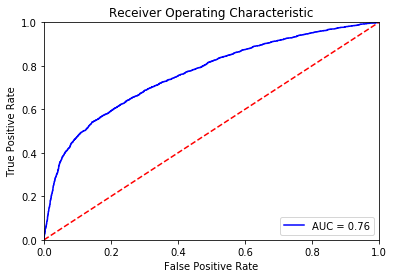

In [87]:
# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [60]:
modelKNN5_predictions = modelKNN5.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, modelKNN5_predictions))
print(classification_report(y_test, modelKNN5_predictions))

[[6457  552]
 [1635  356]]
              precision    recall  f1-score   support

           0       0.80      0.92      0.86      7009
           1       0.39      0.18      0.25      1991

    accuracy                           0.76      9000
   macro avg       0.60      0.55      0.55      9000
weighted avg       0.71      0.76      0.72      9000



In [83]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, modelKNN5_predictions)
acc = accuracy_score(y_test, modelKNN5_predictions)
prec = precision_score(y_test, modelKNN5_predictions)
rec = recall_score(y_test, modelKNN5_predictions)
f1 = f1_score(y_test, modelKNN5_predictions)

results = pd.DataFrame([['KNN / K=5', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,KNN / K=5,0.757,0.39207,0.178805,0.245602,0.550024


In [61]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, modelKNN5_predictions))

Accuracy: 0.757


In [88]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = modelKNN5.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)


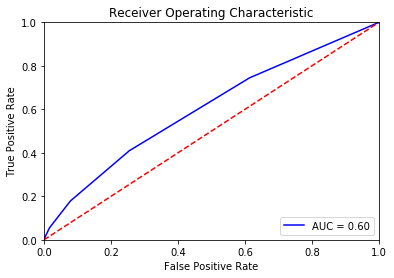

In [89]:
# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [65]:
from sklearn.model_selection import RandomizedSearchCV
# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# number of features at every split
max_features = ['auto', 'sqrt']

# max depth
max_depth = [int(x) for x in np.linspace(100, 500, num = 11)]
max_depth.append(None)
# create random grid
random_grid = {
 'n_estimators': n_estimators,
 'max_features': max_features,
 'max_depth': max_depth
 }
# Random search of parameters
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the model
rfc_random.fit(X_train, y_train)
# print results
print(rfc_random.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 11.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 23.1min finished


{'n_estimators': 1800, 'max_features': 'auto', 'max_depth': 420}


In [66]:
rfc = RandomForestClassifier(n_estimators=1800, max_depth=420, max_features='auto')
rfc.fit(X_train,y_train)
rfc_predict = rfc.predict(X_test)
rfc_cv_score = cross_val_score(rfc, X, y, cv=10, scoring='roc_auc')

In [67]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix ===
[[6604  405]
 [1224  767]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7009
           1       0.65      0.39      0.48      1991

    accuracy                           0.82      9000
   macro avg       0.75      0.66      0.69      9000
weighted avg       0.80      0.82      0.80      9000



=== All AUC Scores ===
[0.73614935 0.74098899 0.74226076 0.72289157 0.76601053 0.77302199
 0.79201017 0.76146912 0.76943513 0.77085658]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.757509417035758


In [68]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, rfc_predict))

Accuracy: 0.819


In [84]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, rfc_predict)
acc = accuracy_score(y_test, rfc_predict)
prec = precision_score(y_test, rfc_predict)
rec = recall_score(y_test, rfc_predict)
f1 = f1_score(y_test, rfc_predict)

results = pd.DataFrame([['Random Forest', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Random Forest,0.819,0.654437,0.385234,0.484983,0.663725


In [75]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = rfc.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)


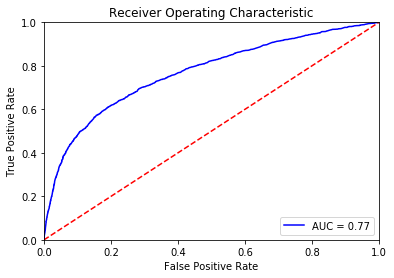

In [76]:
# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [91]:
DT5_predictions = modelDT5.predict(X_test)
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

DT5_predictions_cv_score = cross_val_score(modelDT5, X, y, cv=10, scoring='roc_auc')


In [99]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, DT5_predictions))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, DT5_predictions))
print('\n')
print("=== All AUC Scores ===")
print(modelDT5_predictions_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Decision Tree:", modelDT5_predictions_cv_score.mean())

=== Confusion Matrix ===
[[6754  255]
 [1347  644]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      7009
           1       0.72      0.32      0.45      1991

    accuracy                           0.82      9000
   macro avg       0.78      0.64      0.67      9000
weighted avg       0.81      0.82      0.79      9000



=== All AUC Scores ===
[0.71776387 0.72362943 0.72483129 0.71760018 0.74588358 0.77817703
 0.7794095  0.74437327 0.76264521 0.75263403]


=== Mean AUC Score ===
Mean AUC Score - Decision Tree: 0.7446947393095276


In [100]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, DT5_predictions)
acc = accuracy_score(y_test, DT5_predictions)
prec = precision_score(y_test, DT5_predictions)
rec = recall_score(y_test, DT5_predictions)
f1 = f1_score(y_test, DT5_predictions)

results = pd.DataFrame([['Decision Tree', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Decision Tree,0.822,0.716352,0.323456,0.445675,0.643537


In [101]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = modelDT5.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

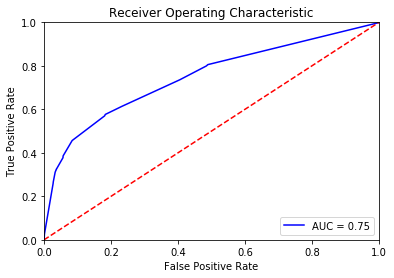

In [102]:
# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [105]:
# trying 3rd SVC model
from sklearn.svm import SVC
svc3 = SVC(kernel = 'rbf', random_state = 0)
svc3.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [106]:
svc3_pred = svc3.predict(X_test)

In [107]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

svc3_pred_cv_score = cross_val_score(svc3, X, y, cv=10, scoring='roc_auc')

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, svc3_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, svc3_pred))
print('\n')
print("=== All AUC Scores ===")
print(svc3_pred_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - SVC: ", svc3_pred_cv_score.mean())


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarni

=== Confusion Matrix ===
[[6959   50]
 [1943   48]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.78      0.99      0.87      7009
           1       0.49      0.02      0.05      1991

    accuracy                           0.78      9000
   macro avg       0.64      0.51      0.46      9000
weighted avg       0.72      0.78      0.69      9000



=== All AUC Scores ===
[0.50078684 0.50974147 0.51082314 0.50842523 0.50651826 0.51598603
 0.50371683 0.50279351 0.51265264 0.51079406]


=== Mean AUC Score ===
Mean AUC Score - SVC:  0.5082238011069621


In [108]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, svc3_pred)
acc = accuracy_score(y_test, svc3_pred)
prec = precision_score(y_test, svc3_pred)
rec = recall_score(y_test, svc3_pred)
f1 = f1_score(y_test, svc3_pred)

results = pd.DataFrame([['Support Vector Machine', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Support Vector Machine,0.778556,0.489796,0.024108,0.045955,0.508487
